In [11]:
import pandas as pd
import json
import engin
import models
import random
import warnings, traceback

In [2]:
with open('/Users/daniil/Documents/Работа/Платформа анализа данных/Прогноз/Auto_forecast/test_data_10000.json', "r", encoding="utf8") as f:
    data = json.load(f)

In [3]:
passed, failed = engin.Filter_for_dataset(data)
print('passed -', len(passed))
print('failed -', len(failed))

passed - 8022
failed - 1978


In [4]:
df = pd.DataFrame(passed)

Разделим данные по частотностям:

In [5]:
# Инициализируем три пустых списка
ye_list = []
q_list = []
me_list = []

# Проходим по исходному списку
for item in passed:
    freq = item.get("pandas_frequency")
    if freq == "YE":
        ye_list.append(item)
    elif freq == "Q":
        q_list.append(item)
    elif freq == "ME":
        me_list.append(item)

print('Годовые данные: ',len(ye_list))
print('Квартальные данные: ',len(q_list))
print('Месячные данные: ',len(me_list))

Годовые данные:  3323
Квартальные данные:  106
Месячные данные:  4591


Так как функция автопрогноза требудет больших вычислительных мощностей, ее тестирование будет для случайно выбранных рядов из каждой категории

In [6]:
# Фиксируем seed для воспроизводимости
random.seed(42+2)

sample_ye = random.sample(ye_list, 30)
sample_q  = random.sample(q_list, 30)
sample_me = random.sample(me_list, 30)

In [8]:
# Функция для тестирования
def testing(data: list,
            Deep_research: bool):
    
    successful_results, raise_dic, warns = {}, {}, []
    
    for i in range(len(data)):
        df = pd.DataFrame(data)
        slice_id = df.loc[i, 'slice_id']
        Data = pd.DataFrame(df.loc[i, 'observations'])

        with warnings.catch_warnings(record=True) as wlist:
                warnings.simplefilter("always")                  # перехватываем все предупреждения
                try:
                    out = engin.Auto_forecast(data[i], Deep_research)
                    successful_results[slice_id] = out
                except Exception as e:
                    # Сохраняем возникшие исключения
                    raise_dic[slice_id] = {
                    "Error_test": e, 
                    "type": type(e).__name__,
                    "msg": str(e),
                    "traceback": traceback.format_exc()
                }
            # Сохраняем предупреждения из этого прогона
                for w in wlist:
                    warns.append({
                        "slice_id": slice_id,
                        "category": w.category.__name__,
                        "message": str(w.message),
                        "filename": w.filename,
                        "lineno": w.lineno,
                    })

        result = {
            'successful_results' : successful_results,
            'raise_dic' : raise_dic,
            'warns' : warns
        }
    return result


In [9]:
res_test_YE_F = testing(sample_ye, False)
res_test_YE_T = testing(sample_ye, True)
print('Статистика: ')
print('--------------------------------------------------------')
print('Успешно c F: ', len(res_test_YE_F['successful_results']))
print('Исключения c F: ', len(res_test_YE_F['raise_dic']))
print('Предупреждения c F: ', len(res_test_YE_F['warns']))
print('--------------------------------------------------------')
print('Успешно c T: ', len(res_test_YE_T['successful_results']))
print('Исключения c T: ', len(res_test_YE_T['raise_dic']))
print('Предупреждения c T: ', len(res_test_YE_T['warns']))

Статистика: 
--------------------------------------------------------
Успешно c F:  15
Исключения c F:  15
Предупреждения c F:  3280
--------------------------------------------------------
Успешно c T:  15
Исключения c T:  15
Предупреждения c T:  9263


In [16]:
pd.DataFrame(res_test_YE_F['raise_dic'])#.iloc[3,0]

,ef5c052f-33ee-44eb-b3b4-37c6517e22ae,d05acaa3-dc23-469f-9b22-2741875e8d99,466b1225-efcc-4fa5-a8d0-507ef028cfd4,978dd99d-5af3-4c3f-9943-bb8cbb18aa7d,d254dbc9-992a-4534-a2e6-b8f9c9f7f306,2dd83d41-82f2-46c7-ae4e-be015957f08e,43724219-6745-4aeb-8eae-7da83439ecea,ea869b99-d143-4e9f-9526-48a2645e3b32,159dbf01-1c24-4e0a-a8f9-90c585b2b87c,00d22a39-5ab5-4669-a877-644352c69113,c05d0635-11e8-42fe-8a73-80890a640de1,3f7583b0-a667-430a-b656-e76093149054,8c3d8d2e-9284-44e6-8528-bfc5dcd68a49,3c2443e9-fdf7-4890-b284-2aadc962113a,49037ead-3e08-4adc-8b4e-f435621a1e06
Error_test,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!
type,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError
msg,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!
traceback,"Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v..."


In [12]:
res_test_Q_F = testing(sample_q, False)
res_test_Q_T = testing(sample_q, True)
print('Статистика: ')
print('--------------------------------------------------------')
print('Успешно c F: ', len(res_test_Q_F['successful_results']))
print('Исключения c F: ', len(res_test_Q_F['raise_dic']))
print('Предупреждения c F: ', len(res_test_Q_F['warns']))
print('--------------------------------------------------------')
print('Успешно c T: ', len(res_test_Q_T['successful_results']))
print('Исключения c T: ', len(res_test_Q_T['raise_dic']))
print('Предупреждения c T: ', len(res_test_Q_T['warns']))

Статистика: 
--------------------------------------------------------
Успешно c F:  26
Исключения c F:  4
Предупреждения c F:  6908
--------------------------------------------------------
Успешно c T:  27
Исключения c T:  3
Предупреждения c T:  19911


In [19]:
pd.DataFrame(res_test_Q_F['raise_dic'])#.iloc[3,2]

,ac3b78bc-8df8-4478-8938-4920e61ca2e8,e13913ca-b232-44f7-9cd2-6352356e5b05,b6838c59-76f4-4e0a-af86-ff21db2fe5c7,2e73a7d3-6d9e-4699-8d91-6dfcb9355314
Error_test,Слишком короткий временной ряд!,Слишком короткий временной ряд!,LU decomposition error.,Слишком короткий временной ряд!
type,AssertionError,AssertionError,LinAlgError,AssertionError
msg,Слишком короткий временной ряд!,Слишком короткий временной ряд!,LU decomposition error.,Слишком короткий временной ряд!
traceback,"Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v..."


In [14]:
res_test_ME_F = testing(sample_me, False)
res_test_ME_T = testing(sample_me, True)
print('Статистика: ')
print('--------------------------------------------------------')
print('Успешно c F: ', len(res_test_ME_F['successful_results']))
print('Исключения c F: ', len(res_test_ME_F['raise_dic']))
print('Предупреждения c F: ', len(res_test_ME_F['warns']))
print('--------------------------------------------------------')
print('Успешно c T: ', len(res_test_ME_T['successful_results']))
print('Исключения c T: ', len(res_test_ME_T['raise_dic']))
print('Предупреждения c T: ', len(res_test_ME_T['warns']))

Статистика: 
--------------------------------------------------------
Успешно c F:  25
Исключения c F:  5
Предупреждения c F:  8679
--------------------------------------------------------
Успешно c T:  25
Исключения c T:  5
Предупреждения c T:  43977


In [15]:
pd.DataFrame(res_test_ME_T['raise_dic'])

,59a67716-1ee4-4c3a-8630-a9825d5e80c5,971d5c1e-01b5-4f16-a86f-7883f2bd6529,312bd3a8-33e2-4573-81c4-fa8f7b1e864d,540c10b6-0a86-4ce3-8dbe-ec94a1f7bce9,ea234156-6e9e-45c4-9d89-2ac8b80624d1
Error_test,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!
type,AssertionError,AssertionError,AssertionError,AssertionError,AssertionError
msg,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!,Слишком короткий временной ряд!
traceback,"Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v...","Traceback (most recent call last):\n File ""/v..."


Отключения моделей которые "падают"

In [ ]:
engin.Auto_forecast(Data = dict(df[df['slice_id'] == 'b6838c59-76f4-4e0a-af86-ff21db2fe5c7'].iloc[0]),
                    Deep_research = False)

In [ ]:
models.ps_ARIMA(Data = dict(df[df['slice_id'] == 'b6838c59-76f4-4e0a-af86-ff21db2fe5c7'].iloc[0]),
                Deep_forecast_period = 8,
                Forecast_horizon = 4,
                Reassessment = False)

In [10]:
sample_me[0]

{'slice_id': '1d69b247-dda0-4624-846d-6b422aebb952',
 'dataset_id': '6a453150-7c11-4d0a-877b-82776a531a63',
 'vintage_link': 'https://data.vavt.ru/ru/analytic_sets/dataset/163190/chart',
 'pandas_frequency': 'ME',
 'exceptions': {},
 'observations_count': 37,
 'properties': ['Рыбинск'],
 'observations': [{'date': '31.01.2022', 'obs': 12.31},
  {'date': '28.02.2022', 'obs': 12.08},
  {'date': '31.03.2022', 'obs': 12.43},
  {'date': '30.04.2022', 'obs': 12.43},
  {'date': '31.05.2022', 'obs': 12.43},
  {'date': '30.06.2022', 'obs': 12.54},
  {'date': '31.07.2022', 'obs': 12.83},
  {'date': '31.08.2022', 'obs': 12.83},
  {'date': '30.09.2022', 'obs': 12.83},
  {'date': '31.10.2022', 'obs': 12.83},
  {'date': '30.11.2022', 'obs': 12.83},
  {'date': '31.12.2022', 'obs': 12.83},
  {'date': '31.01.2023', 'obs': 13.77},
  {'date': '28.02.2023', 'obs': 13.82},
  {'date': '31.03.2023', 'obs': 13.82},
  {'date': '30.04.2023', 'obs': 13.82},
  {'date': '31.05.2023', 'obs': 13.77},
  {'date': '30.0

In [12]:
engin.Auto_forecast(sample_me[10], True)

,Дата,Шаги,Модель,Прогноз
0,31.08.2025,Горизонт 1,RW,448.13
1,30.09.2025,Горизонт 2,RW,448.13
2,31.10.2025,Горизонт 3,RW,448.13
3,30.11.2025,Горизонт 4,RW,448.13
4,31.12.2025,Горизонт 5,RW,448.13
5,31.01.2026,Горизонт 6,RW,448.13
6,28.02.2026,Горизонт 7,RW,448.13
7,31.03.2026,Горизонт 8,RW,448.13
8,30.04.2026,Горизонт 9,RWD,461.16
9,31.05.2026,Горизонт 10,RWD,462.61


In [14]:
import matplotlib.pyplot as plt

def plot_observations_distribution(df, freq_col="pandas_frequency", count_col="observations_count"):
    """
    Строит распределения observations_count для каждой pandas_frequency.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Входной датафрейм.
    freq_col : str
        Название колонки с частотностью.
    count_col : str
        Название колонки с количеством наблюдений.
    """
    
    # Получаем уникальные частоты
    freqs = df[freq_col].unique()
    
    # Создаём фигуру
    n = len(freqs)
    cols = 2
    rows = (n + 1) // cols
    
    plt.figure(figsize=(12, 4 * rows))
    
    for i, freq in enumerate(freqs, 1):
        plt.subplot(rows, cols, i)
        subset = df[df[freq_col] == freq][count_col]
        
        plt.hist(subset, bins=20, edgecolor="black")
        plt.title(f"Распределение для частоты: {freq}")
        plt.xlabel(count_col)
        plt.ylabel("Количество")
    
    plt.tight_layout()
    plt.show()

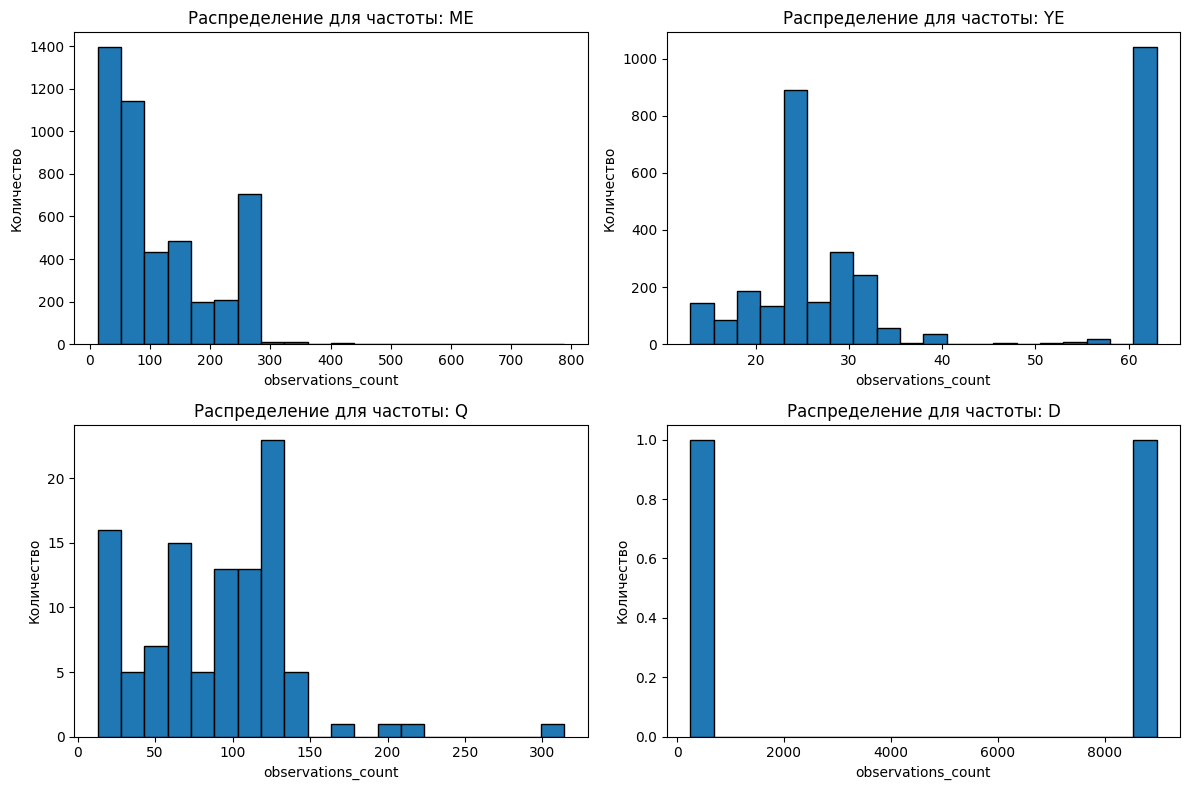

In [15]:
plot_observations_distribution(df)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def summarize_observation_ranges(
    df,
    freq_col="pandas_frequency",
    count_col="observations_count",
    bins=10,
    plot=True
):
    """
    Для каждой частоты (pandas_frequency) находит:
    - интервал (диапазон) длины рядов, который встречается чаще всего;
    - долю рядов в этом интервале (в процентах);
    - среднюю длину ряда.
    
    Параметры
    ---------
    df : pd.DataFrame
        Входной датафрейм.
    freq_col : str
        Название колонки с частотой (частотностью таймсерий).
    count_col : str
        Название колонки с длиной ряда / количеством наблюдений.
    bins : int или sequence
        Количество бинов или явные границы для np.histogram.
    plot : bool
        Если True — дополнительно рисует барчарт с процентами по частотам.
        
    Возвращает
    ----------
    summary_df : pd.DataFrame
        Таблица с колонками:
        [freq, total_rows, bin_left, bin_right, most_common_count, percent_in_bin, mean_length]
    """
    results = []

    for freq, group in df.groupby(freq_col):
        values = group[count_col].dropna().values
        
        if len(values) == 0:
            continue
        
        # Строим гистограмму, но без рисунка — просто считаем
        counts, bin_edges = np.histogram(values, bins=bins)
        
        # Находим бин с максимумом объектов
        max_idx = np.argmax(counts)
        bin_left = bin_edges[max_idx]
        bin_right = bin_edges[max_idx + 1]
        most_common_count = counts[max_idx]
        
        total_rows = len(values)
        percent_in_bin = most_common_count / total_rows * 100.0
        mean_length = values.mean()
        
        results.append({
            "freq": freq,
            "total_rows": total_rows,
            "bin_left": bin_left,
            "bin_right": bin_right,
            "most_common_count": most_common_count,
            "percent_in_bin": percent_in_bin,
            "mean_length": mean_length,
        })
    
    summary_df = pd.DataFrame(results).sort_values("freq")
    
    if plot and not summary_df.empty:
        plt.figure(figsize=(10, 5))
        plt.bar(summary_df["freq"].astype(str), summary_df["percent_in_bin"])
        plt.ylabel("Доля рядов в самом частом диапазоне, %")
        plt.xlabel("pandas_frequency")
        plt.title("Процент рядов в наиболее часто встречающемся диапазоне длины")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    return summary_df

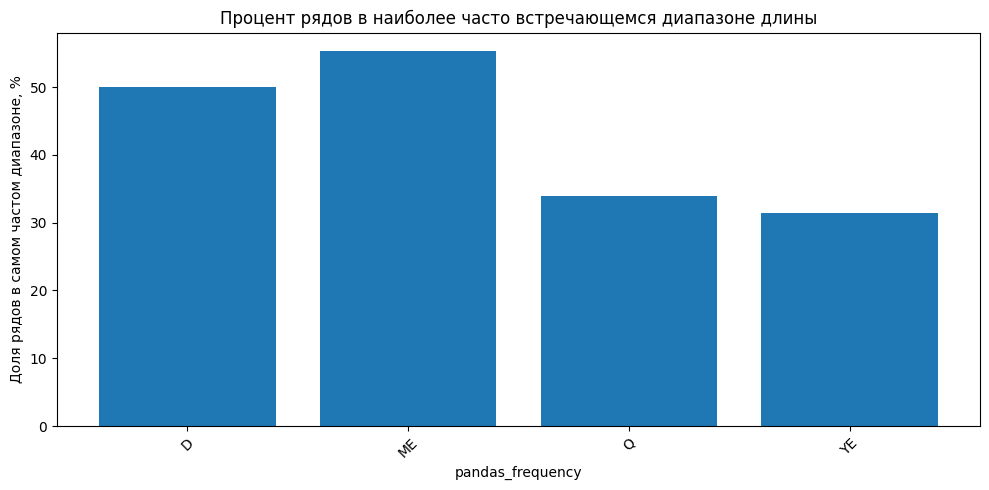

,freq,total_rows,bin_left,bin_right,most_common_count,percent_in_bin,mean_length
0,D,2,246.0,1119.0,1,50.000000,4611.000000
1,ME,4591,13.0,90.5,2538,55.282074,114.187759
2,Q,106,103.3,133.4,36,33.962264,88.566038
3,YE,3323,58.0,63.0,1042,31.357207,36.741800


In [17]:
summarize_observation_ranges(df)

In [20]:
def analyze_common_range(
    df,
    freq_col="pandas_frequency",
    count_col="observations_count",
    bins=10,
    plot=True
):
    """
    Анализирует наиболее частый диапазон наблюдений для каждой частоты
    и показывает детальное распределение внутри этого диапазона.
    
    Возвращает словарь вида:
    {
        freq: {
            'bin_left': ...,
            'bin_right': ...,
            'subset': pd.Series,
            'stats': {...}
        }
    }
    """
    
    detailed = {}

    for freq, group in df.groupby(freq_col):
        values = group[count_col].dropna().values
        if len(values) == 0:
            continue
        
        # Основная гистограмма для выбора наиболее частого диапазона
        counts, bin_edges = np.histogram(values, bins=bins)
        max_idx = np.argmax(counts)

        bin_left = bin_edges[max_idx]
        bin_right = bin_edges[max_idx + 1]

        # Значения в пределах наиболее частого бина
        subset = group[
            (group[count_col] >= bin_left) &
            (group[count_col] < bin_right)
        ][count_col]

        # Статистика
        stats = {
            "count": len(subset),
            "percent_of_group": 100 * len(subset) / len(group),
            "mean": subset.mean(),
            "median": subset.median(),
            "q1": subset.quantile(0.25),
            "q3": subset.quantile(0.75),
            "min": subset.min(),
            "max": subset.max(),
        }

        detailed[freq] = {
            "bin_left": bin_left,
            "bin_right": bin_right,
            "subset": subset,
            "stats": stats
        }

        # --- Визуализация ---
        if plot:
            plt.figure(figsize=(8, 4))
            plt.hist(subset, bins=15, edgecolor="black")
            plt.title(
                f"Детальное распределение внутри частого диапазона для {freq}\n"
                f"Диапазон: [{bin_left:.1f}, {bin_right:.1f})"
            )
            plt.xlabel(count_col)
            plt.ylabel("Количество")
            plt.tight_layout()
            plt.show()

    return #detailed

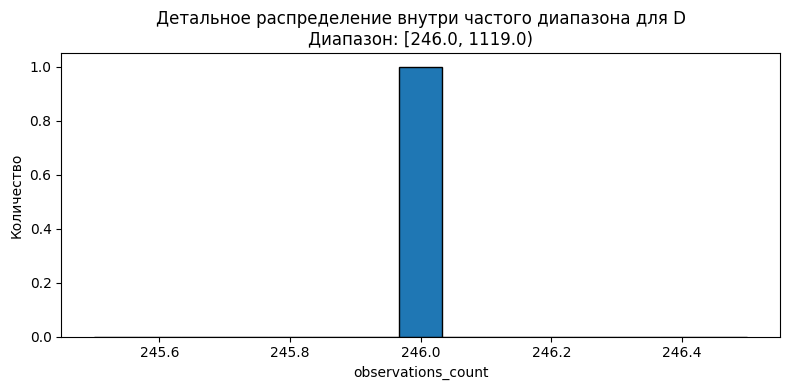

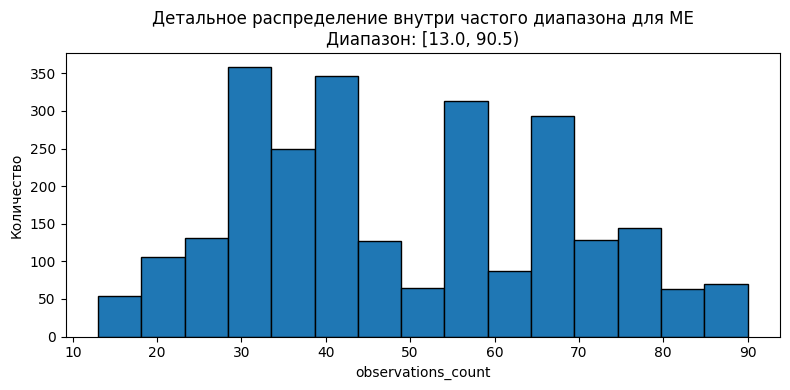

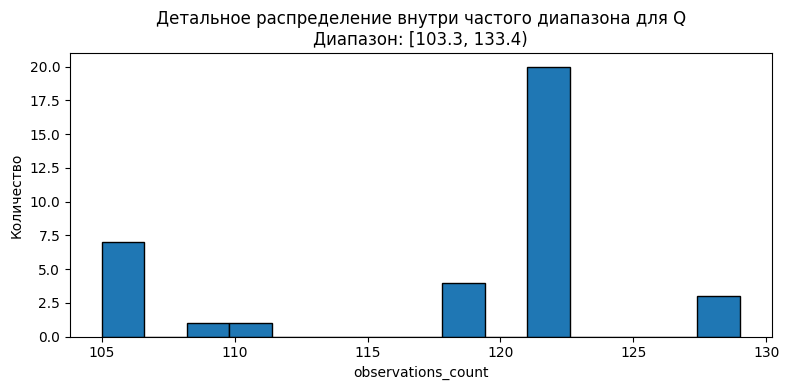

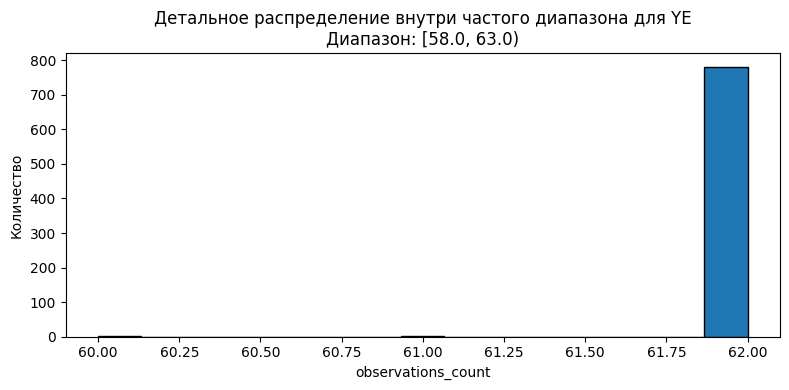

In [21]:
analyze_common_range(df)

In [27]:
# Фильтруем только годовые ряды
yearly = df[df["pandas_frequency"] == "YE"]

# Фильтруем по длине ряда (25–40 включительно)
mask = (yearly["observations_count"] >= 15) & (yearly["observations_count"] <= 24)

# Считаем количество таких рядов
count_yearly_25_40 = yearly[mask].shape[0]

count_yearly_25_40

1277

In [39]:
def select_models_for_series(Data):
    """
    series_list: list[dict]
        Каждый словарь должен содержать:
        {
            "pandas_frequency": "ME" | "QE" | "YE",
            "observations_count": int
        }

    Возвращает список словарей:
    [
        {
            "pandas_frequency": "...",
            "observations_count": ...,
            "available_models": [...]
        },
        ...
    ]
    """

    # Таблица соответствия (полностью из твоей схемы)
    rules = {
        "ME": [
            (5,  ["RW", "RWD"]),
            (6,  ["RW", "RWD", "TS"]),
            (12, ["RW", "RWD", "TS"]),
            (24, ["RW", "RWD", "TS", "RWS", "RWDS"]),
            (25, ["RW", "RWD", "TS", "RWS", "RWDS"]),
            (27, ["RW", "RWD", "TS", "RWS", "RWDS"]),
            (40, ["RW", "RWD", "TS", "RWS", "RWDS", "ARIMA", "Custom_ARIMA"]),
        ],
        "QE": [
            (5,  ["RW", "RWD"]),
            (6,  ["RW", "RWD", "TS"]),
            (12, ["RW", "RWD", "TS", "RWS", "RWDS"]),
            (24, ["RW", "RWD", "TS", "RWS", "RWDS"]),
            (25, ["RW", "RWD", "TS", "RWS", "RWDS"]),
            (27, ["RW", "RWD", "TS", "RWS", "RWDS", "ARIMA", "Custom_ARIMA"]),
            (40, ["RW", "RWD", "TS", "RWS", "RWDS", "ARIMA", "Custom_ARIMA"]),
        ],
        "YE": [
            (5,  ["RW", "RWD"]),
            (6,  ["RW", "RWD", "TS"]),
            (12, ["RW", "RWD", "TS"]),
            (24, ["RW", "RWD", "TS"]),
            (25, ["RW", "RWD", "TS", "ARIMA"]),
            (27, ["RW", "RWD", "TS", "ARIMA", "Custom_ARIMA"]),
            (40, ["RW", "RWD", "TS", "ARIMA", "Custom_ARIMA"]),
        ],
    }

    results = []

    n = len(pd.DataFrame(Data['observations'])['obs'])
    freq = Data['pandas_frequency']
    
    if freq not in rules:
        raise ValueError(f"Неизвестная частотность: {freq}")
    # Находим минимальный порог, который <= n
    available_models = []
    for threshold, models in rules[freq]:
        if n >= threshold:
            available_models = models  # обновляем (берем наибольший подходящий)
    
    results.append({
        "pandas_frequency": freq,
        "observations_count": n,
        "available_models": available_models
    })

    return results


In [46]:
select_models_for_series(sample_me[8])

[{'pandas_frequency': 'ME',
  'observations_count': 96,
  'available_models': ['RW',
   'RWD',
   'TS',
   'RWS',
   'RWDS',
   'ARIMA',
   'Custom_ARIMA']}]